### Image Classification of an American Sign Language Dataset

In [1]:
import pandas as pd

In [3]:
train_df = pd.read_csv("/Users/Asus/OneDrive/Desktop/sign_mnist_train.csv")
valid_df = pd.read_csv("/Users/Asus/OneDrive/Desktop/sign_mnist_valid.csv")

Exploring the data

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Extracting the Labels

In [5]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

Extracting the Images

In [6]:
x_train = train_df.values
x_valid = valid_df.values

Summarizing the Training and Validation Data

In [7]:
x_train.shape

(27455, 784)

In [8]:
y_train.shape

(27455,)

In [9]:
x_valid.shape

(7172, 784)

In [10]:
y_valid.shape

(7172,)

Visualizing the Data

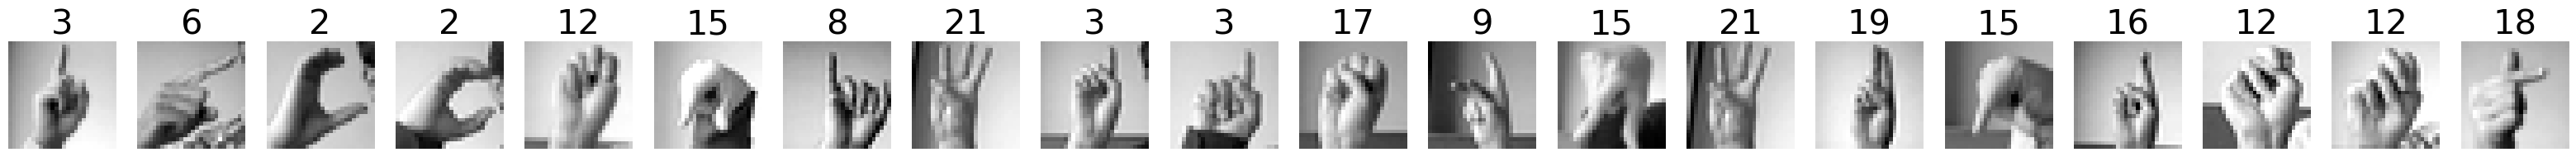

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [12]:
x_train.min()

0

In [13]:
x_train.max()

255

Normalizing the Image Data

In [16]:
x_train = train_df.values / 255
x_valid = valid_df.values / 255

Categorizing the Labels

In [15]:
import tensorflow.keras as keras
num_classes = 24

In [17]:
if not y_train.shape[-1] == 24:  # Avoid running multiple times
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)

Building the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

Summarizing the Model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


Compiling the Model

In [21]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 9s 9ms/step - loss: 1.9700 - accuracy: 0.3774 - val_loss: 1.2765 - val_accuracy: 0.5777
Epoch 2/20
858/858 [==============================] - 9s 10ms/step - loss: 0.9611 - accuracy: 0.6740 - val_loss: 1.0680 - val_accuracy: 0.6326
Epoch 3/20
858/858 [==============================] - 8s 9ms/step - loss: 0.5772 - accuracy: 0.8036 - val_loss: 1.0507 - val_accuracy: 0.6829
Epoch 4/20
858/858 [==============================] - 8s 10ms/step - loss: 0.3826 - accuracy: 0.8782 - val_loss: 0.8426 - val_accuracy: 0.7571
Epoch 5/20
858/858 [==============================] - 9s 10ms/step - loss: 0.2873 - accuracy: 0.9150 - val_loss: 1.3891 - val_accuracy: 0.6949
Epoch 6/20
858/858 [==============================] - 8s 10ms/step - loss: 0.2220 - accuracy: 0.9343 - val_loss: 0.8055 - val_accuracy: 0.8296
Epoch 7/20
858/858 [==============================] - 8s 9ms/step - loss: 0.2008 - accuracy: 0.9458 - val_loss: 1.2319 - val_accuracy: 0.7510
Ep

Evaluating the model

In [23]:
model.evaluate(x_valid,y_valid)

225/225 [==============================] - 1s 2ms/step - loss: 1.7047 - accuracy: 0.8210


[1.7046897411346436, 0.8209704160690308]